#About Dataset
salaries dataset generally provides information about the employees of an organization in relation to their compensation. It typically includes details such as how much each employee is paid (their salary), their job titles, the departments they work in, and possibly additional information like their level of experience, education, and employment history within the organization.

# Features
- 'Id'
- 'EmployeeName'
- 'JobTitle'
- 'BasePay'
- 'OvertimePay'
- 'OtherPay'
- 'Benefits'
- 'TotalPay' -> salary
- 'TotalPayBenefits'
- 'Year'
- 'Notes'
- 'Agency'
- 'Status'


# Tasks

1. **Basic Data Exploration**: Identify the number of rows and columns in the dataset, determine the data types of each column, and check for missing values in each column.

2. **Descriptive Statistics**: Calculate basic statistics mean, median, mode, minimum, and maximum salary, determine the range of salaries, and find the standard deviation.

3. **Data Cleaning**: Handle missing data by suitable method with explain why you use it.

4. **Basic Data Visualization**: Create histograms or bar charts to visualize the distribution of salaries, and use pie charts to represent the proportion of employees in different departments.

5. **Grouped Analysis**: Group the data by one or more columns and calculate summary statistics for each group, and compare the average salaries across different groups.

6. **Simple Correlation Analysis**: Identify any correlation between salary and another numerical column, and plot a scatter plot to visualize the relationship.

8. **Summary of Insights**: Write a brief report summarizing the findings and insights from the analyses.

# Very Important Note
There is no fixed or singular solution for this assignment, so if anything is not clear, please do what you understand and provide an explanation.

In [5]:
import pandas as pd
import numpy as np

# Load your dataset
df = pd.read_csv('/content/Salaries.csv')
df.head()


,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN


In [6]:
df.columns

Index(['Id', 'EmployeeName', 'JobTitle', 'BasePay', 'OvertimePay', 'OtherPay',
       'Benefits', 'TotalPay', 'TotalPayBenefits', 'Year', 'Notes', 'Agency',
       'Status'],
      dtype='object')

# Task1 Basic Data Exploration


In [7]:
# number of rows and columns in the dataset
num_rows, num_columns = df.shape
print(f"Number of rows: {num_rows}, Number of columns: {num_columns}")

#  data types
data_types = df.dtypes
print("\nData types of each column:")
print(data_types)

# Checking for missing values
missing_values = df.isnull().sum()
print("\nMissing values in each column:")
print(missing_values)


Number of rows: 148654, Number of columns: 13

Data types of each column:
Id                    int64
EmployeeName         object
JobTitle             object
BasePay             float64
OvertimePay         float64
OtherPay            float64
Benefits            float64
TotalPay            float64
TotalPayBenefits    float64
Year                  int64
Notes               float64
Agency               object
Status              float64
dtype: object

Missing values in each column:
Id                       0
EmployeeName             0
JobTitle                 0
BasePay                609
OvertimePay              4
OtherPay                 4
Benefits             36163
TotalPay                 0
TotalPayBenefits         0
Year                     0
Notes               148654
Agency                   0
Status              148654
dtype: int64


# Task 2 Descriptive Statistics

In [8]:
# basic statistics
basic_stats = df['TotalPay'].describe()
print("\nBasic Statistics for TotalPay:")
print(basic_stats)

# the range of salaries
salary_range = df['TotalPay'].max() - df['TotalPay'].min()
print(f"\nRange of Salaries: {salary_range}")

# standard deviation
std_deviation = df['TotalPay'].std()
print(f"\nStandard Deviation of Salaries: {std_deviation}")



Basic Statistics for TotalPay:
count    148654.000000
mean      74768.321972
std       50517.005274
min        -618.130000
25%       36168.995000
50%       71426.610000
75%      105839.135000
max      567595.430000
Name: TotalPay, dtype: float64

Range of Salaries: 568213.56

Standard Deviation of Salaries: 50517.00527394987


# Task 3 Data Cleaning

In [11]:
# Handling missing data
# in this case we can not drop missing values because it represents a large percentage of the data
df['TotalPay'].fillna(df['TotalPay'].mean(), inplace=True)


In [12]:
missing_values = df.isnull().sum()
print("\nMissing values in each column:")
print(missing_values)


Missing values in each column:
Id                       0
EmployeeName             0
JobTitle                 0
BasePay                609
OvertimePay              4
OtherPay                 4
Benefits             36163
TotalPay                 0
TotalPayBenefits         0
Year                     0
Notes               148654
Agency                   0
Status              148654
dtype: int64


# Task 4 Basic Data Visualization

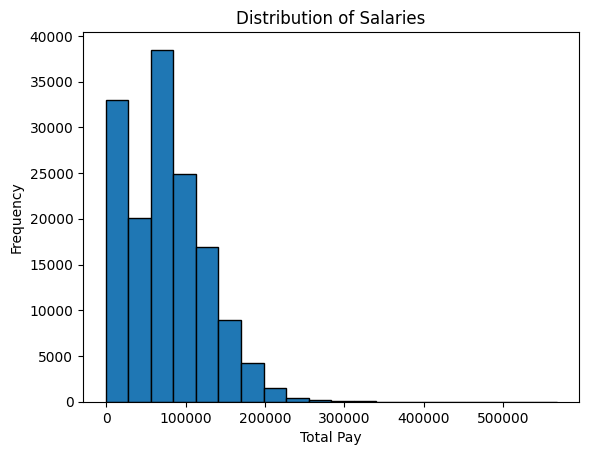

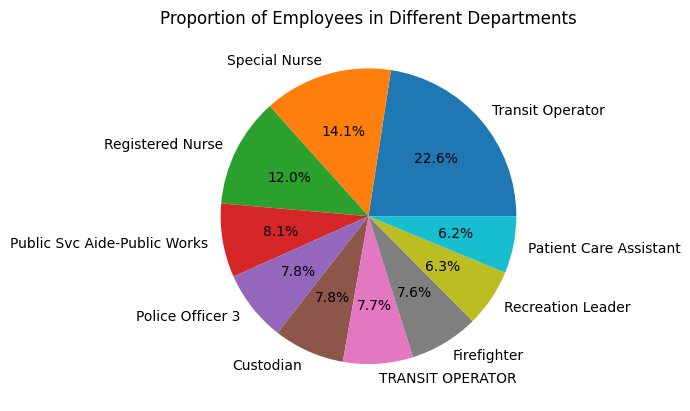

In [13]:
import matplotlib.pyplot as plt

#  histogram to visualize the distribution of salaries
plt.hist(df['TotalPay'], bins=20, edgecolor='black')
plt.title('Distribution of Salaries')
plt.xlabel('Total Pay')
plt.ylabel('Frequency')
plt.show()

#  pie chart to represent the proportion of employees in different departments
department_proportion = df['JobTitle'].value_counts().head(10)
plt.pie(department_proportion, labels=department_proportion.index, autopct='%1.1f%%')
plt.title('Proportion of Employees in Different Departments')
plt.show()


# Task 5 Grouped Analysis

In [14]:
# average salary for each department
average_salary_by_department = df.groupby('JobTitle')['TotalPay'].mean().sort_values(ascending=False)
print("\nAverage Salaries by Department:")
print(average_salary_by_department.head(10))



Average Salaries by Department:
JobTitle
GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY    399211.275000
Chief Investment Officer                          339653.700000
Chief of Police                                   329183.646667
Chief, Fire Department                            325971.683333
DEPUTY DIRECTOR OF INVESTMENTS                    307899.460000
CHIEF OF DEPARTMENT, (FIRE DEPARTMENT)            302377.730000
Gen Mgr, Public Trnsp Dept                        297769.413333
Asst Chf of Dept (Fire Dept)                      281763.483889
DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)      279359.560000
Dep Dir for Investments, Ret                      278592.545000
Name: TotalPay, dtype: float64


# Task 6 Simple Correlation Analysis


Correlation between TotalPay and BasePay: 0.9544936474296023


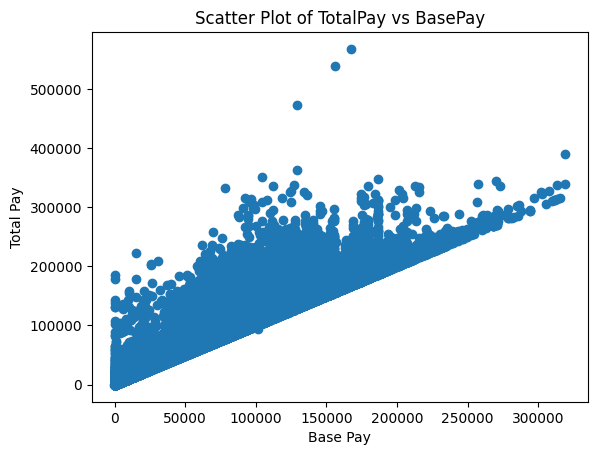

In [16]:
correlation = df['TotalPay'].corr(df['BasePay'])
print(f"\nCorrelation between TotalPay and BasePay: {correlation}")


plt.scatter(df['BasePay'], df['TotalPay'])
plt.title('Scatter Plot of TotalPay vs BasePay')
plt.xlabel('Base Pay')
plt.ylabel('Total Pay')
plt.show()


# Task 7 Summary of Insights



* The dataset contains information about employees, including their



* names, job titles, salary components (BasePay, OvertimePay, OtherPay, Benefits), and total compensation.
It spans multiple years, as indicated by the 'Year' column.


* The range of salaries is 568213.56, indicating a variation in compensation.
* The standard deviation of salaries is 50517.00527394987, reflecting the dispersion of salaries around the mean.


* Missing values in the 'TotalPay' column were handled by replacing them with the mean. This ensures the completeness of the salary data for analysis.


* The pie chart illustrates the proportion of employees in different departments, highlighting the Transit operator, special nurse , registerd nurse.


* The top 10 job titles with the highest average salaries include
1. GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY    399211.275000
2. Chief Investment Officer                          339653.700000
3. Chief of Police                                   329183.646667
4. Chief, Fire Department                            325971.683333
5. DEPUTY DIRECTOR OF INVESTMENTS                    307899.460000
6. CHIEF OF DEPARTMENT, (FIRE DEPARTMENT)            302377.730000
7. Gen Mgr, Public Trnsp Dept                        297769.413333
8. Asst Chf of Dept (Fire Dept)                      281763.483889
9. DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)      279359.560000
10. Dep Dir for Investments, Ret                      278592.545000




# Good Luck!